In [1]:
import numpy as np
import fitsio
import matplotlib.pyplot as plt
import os
import pandas as pd
import utils
import glob
import tqdm.notebook as tqdm
import matplotlib

font = {'size' : 30}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=25)
matplotlib.rc('ytick', labelsize=25)
matplotlib.rc('legend', markerscale=0.5) 
matplotlib.rc('legend', fontsize=20)

In [2]:
files = glob.glob('../data/*/*')

In [3]:
classes = []
nimages_seq = []
signal_median = []
signal_noise_median = []
pbar = tqdm.tqdm(total=len(files))
total_img = 0

for file in files:
    tclass = file.split('/')[2]
    h = fitsio.read_header(file, ext=1)
    classes.append(tclass)
    nimages_seq.append(h['N_IMAGES'])
    total_img += h['N_IMAGES']
    hdu_max = h['N_IMAGES']+1
    signal_noise = []
    signal = []
    for ext in range(2,hdu_max+1):
        image = fitsio.read(file, ext=ext)
        signal_noise.append(np.average(image)/np.std(image))
        signal.append(np.average(image))
    signal_noise_median.append(np.median(signal_noise))
    signal_median.append(np.median(signal))
    pbar.update()
pbar.close()
print(total_img)

<ipython-input-3-8f92a2269f2b>:19: RuntimeWarning: divide by zero encountered in double_scalars
  signal_noise.append(np.average(image)/np.std(image))
<ipython-input-3-8f92a2269f2b>:19: RuntimeWarning: invalid value encountered in double_scalars
  signal_noise.append(np.average(image)/np.std(image))



1249079


In [4]:
classes = np.array(classes)
nimages_seq = np.array(nimages_seq)
signal_median = np.array(signal_median)
signal_noise_median = np.array(signal_noise_median)
len(classes), len(nimages_seq), len(signal_median), len(signal_noise_median)

(16307, 16307, 16307, 16307)

In [5]:
df = pd.DataFrame(np.array([classes,nimages_seq,signal_noise_median,signal_median]).T, columns=['class','nimages_seq','signal_noise_median','signal_median'])
df.to_csv('./statistics.csv', index=False )

In [6]:
df = pd.read_csv('./statistics.csv')
classes = df['class']
nimages_seq = df['nimages_seq']
signal_noise_median = df['signal_noise_median']
signal_median = df['signal_median']

In [7]:
uclasses = np.unique(classes)
for uclass in uclasses:
    print(uclass, sum(np.array(classes)==uclass))

AGN 606
BZ 239
CV 772
NON 12500
OTHER 818
SN 1372


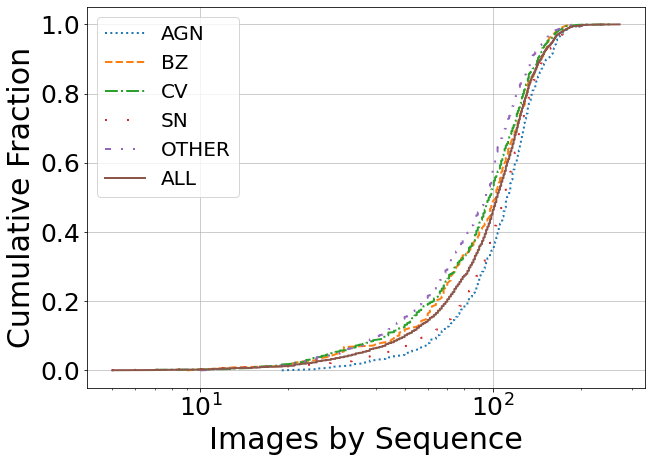

In [8]:
fig = plt.figure(figsize=(10,7))
for tclass, z in zip(['AGN','BZ','CV','SN','OTHER'],[':','--','-.',(0, (1, 10)),(0, (3, 5, 1, 5, 1, 5))]):
    ii = (tclass == classes)
    nimages = np.sort(nimages_seq[ii])
    n_points = len(nimages)
    plt.plot(nimages, np.linspace(0,1,n_points), label=tclass, linestyle=z, linewidth=2)
    
ii = (classes != 'NON')
nimages = np.sort(nimages_seq[ii])
n_points = len(nimages)
plt.plot(nimages, np.linspace(0,1,n_points), label='ALL', linestyle='-', linewidth=2)
plt.grid(alpha=0.8)
plt.xlabel('Images by Sequence')
plt.ylabel('Cumulative Fraction')
plt.xscale('log')
plt.legend()
plt.savefig('./cumulative_NSequence_classes.pdf', bbox_inches='tight')
plt.show()

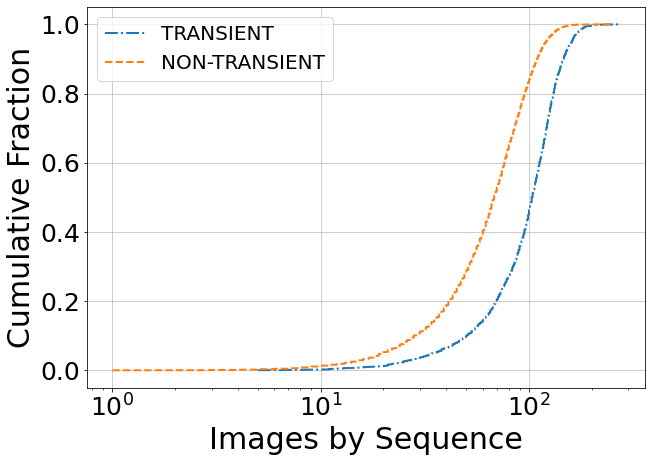

In [9]:
fig = plt.figure(figsize=(10,7))

ii = (classes != 'NON')
nimages = np.sort(nimages_seq[ii])
n_points = len(nimages)
plt.plot(nimages, np.linspace(0,1,n_points), label='TRANSIENT', linestyle='-.', linewidth=2)

ii = (classes == 'NON')
nimages = np.sort(nimages_seq[ii])
n_points = len(nimages)
plt.plot(nimages, np.linspace(0,1,n_points), label='NON-TRANSIENT', linestyle='--', linewidth=2)

plt.legend()
plt.grid(alpha=0.8)
plt.xlabel('Images by Sequence')
plt.ylabel('Cumulative Fraction')
plt.xscale('log')
plt.savefig('./cumulative_NSequence_TvsNT.pdf', bbox_inches='tight')
plt.show()

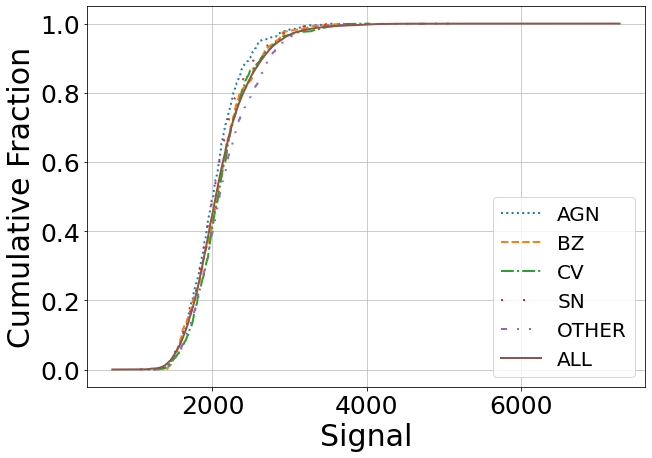

In [10]:
fig = plt.figure(figsize=(10,7))
for tclass, z in zip(['AGN','BZ','CV','SN','OTHER'],[':','--','-.',(0, (1, 10)),(0, (3, 5, 1, 5, 1, 5))]):
    ii = (tclass == classes)
    snm = np.sort(signal_median[ii])
    n_points = len(snm)
    plt.plot(snm, np.linspace(0,1,n_points), label=tclass, linestyle=z, linewidth=2)
    
snm_all = np.sort(signal_median)
n_points = len(snm_all)
plt.plot(snm_all, np.linspace(0,1,n_points), label='ALL', linestyle='-', linewidth=2)
plt.grid(alpha=0.8)
plt.xlabel('Signal')
plt.ylabel('Cumulative Fraction')
plt.legend(markerscale=2.)
plt.savefig('./cumulative_signal_classes.pdf', bbox_inches='tight')
plt.show()

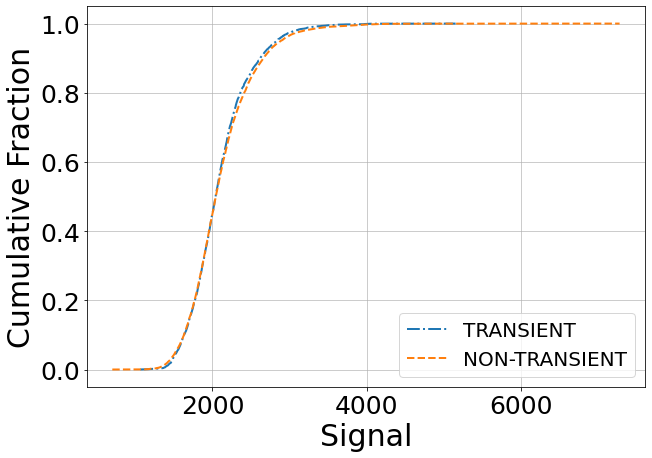

In [11]:
fig = plt.figure(figsize=(10,7))

ii = (classes != 'NON')
snm = np.sort(signal_median[ii])
n_points = len(snm)
plt.plot(snm, np.linspace(0,1,n_points), label='TRANSIENT', linestyle='-.', linewidth=2)

ii = (classes == 'NON')
snm = np.sort(signal_median[ii])
n_points = len(snm)
plt.plot(snm, np.linspace(0,1,n_points), label='NON-TRANSIENT', linestyle='--', linewidth=2)

plt.legend()
plt.grid(alpha=0.8)
plt.xlabel('Signal')
plt.ylabel('Cumulative Fraction')
plt.savefig('./cumulative_signal_TvsNT.pdf', bbox_inches='tight')
plt.show()

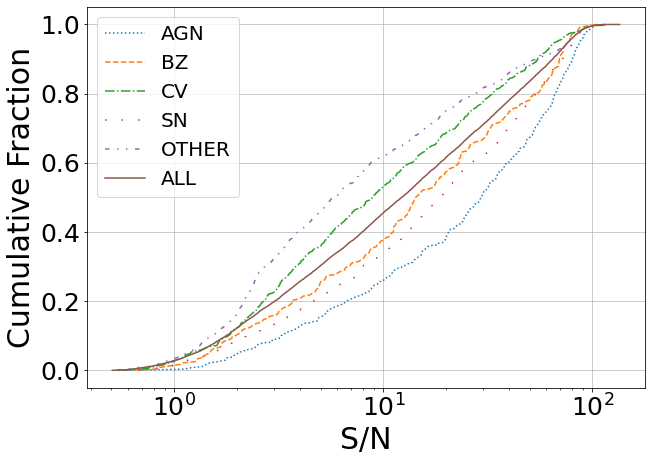

In [12]:
fig = plt.figure(figsize=(10,7))
for tclass, z in zip(['AGN','BZ','CV','SN','OTHER'],[':','--','-.',(0, (1, 10)),(0, (3, 5, 1, 5, 1, 5))]):
    ii = (tclass == classes)
    snm = np.sort(signal_noise_median[ii])
    n_points = len(snm)
    plt.plot(snm, np.linspace(0,1,n_points), label=tclass, linestyle=z)
    
snm_all = np.sort(signal_noise_median)
n_points = len(snm_all)
plt.plot(snm_all, np.linspace(0,1,n_points), label='ALL', linestyle='-')
plt.grid(alpha=0.8)
plt.xlabel('S/N')
plt.xscale('log')
plt.ylabel('Cumulative Fraction')
plt.legend()
plt.savefig('./cumulative_signalnoise_classes.pdf', bbox_inches='tight')
plt.show()

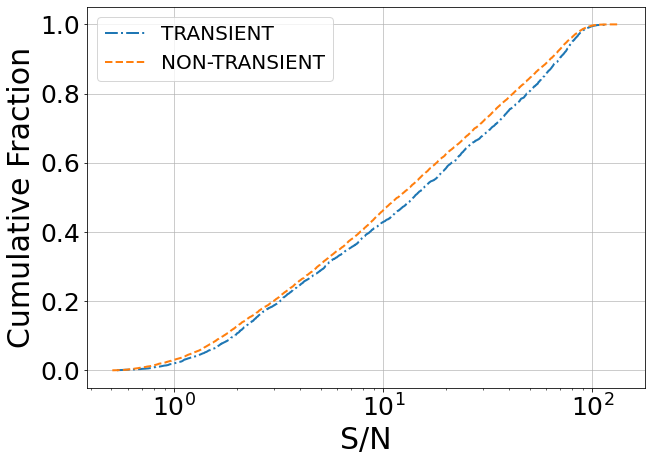

In [13]:
fig = plt.figure(figsize=(10,7))

ii = (classes != 'NON')
snm = np.sort(signal_noise_median[ii])
n_points = len(snm)
plt.plot(snm, np.linspace(0,1,n_points), label='TRANSIENT', linestyle='-.', linewidth=2)

ii = (classes == 'NON')
snm = np.sort(signal_noise_median[ii])
n_points = len(snm)
plt.plot(snm, np.linspace(0,1,n_points), label='NON-TRANSIENT', linestyle='--', linewidth=2)

plt.legend()
plt.grid(alpha=0.8)
plt.xlabel('S/N')
plt.xscale('log')
plt.ylabel('Cumulative Fraction')
plt.savefig('./cumulative_signalnoise_TvsNT.pdf', bbox_inches='tight')
plt.show()

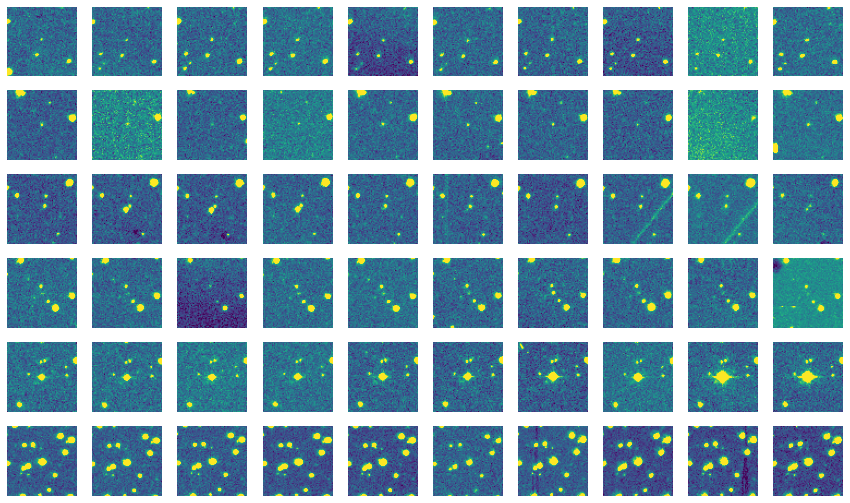

In [16]:
files2plot = ['../data/AGN/CSS130627:001809+274920.fits',
'../data/BZ/CSS110427:133245+472224.fits',
'../data/CV/CSS090102:230342+171755.fits',
'../data/SN/CSS100706:141532-094356.fits',    
'../data/OTHER/CSS100911:234203-043105.fits',
'../data/NON/nonCSS:242.613-0.674915.fits']

i = 1
N = 50
fig = plt.figure(figsize=(15,9))
for file2plot in files2plot:
    Ny = 10
    exts = np.random.choice(N, Ny, replace= False)+2
    data = fitsio.read(file2plot)
    MJDs = np.array(data['MJD'])[exts-2]
    iimjd = np.argsort(MJDs)
    exts = exts[iimjd]
    for ext in exts:
        plt.subplot(6,Ny,i)
        data = fitsio.read(file2plot, ext=ext)
        zmin, zmax = utils.zscale(data)
        plt.imshow(data, vmin=zmin, vmax=zmax)
        plt.axis('off')
        i += 1

plt.savefig('./objects_matrix.pdf', bbox_inches='tight')
plt.show()